In [1]:
import pandas as pd

In [2]:
rankings = pd.read_csv('browser_rankings_data.csv', skiprows=1, parse_dates = ["Date of Last Description Change"])
rankings = rankings[rankings["Rank"].notna()]

##### For each unqique ID - keep the row with the latest description alone

In [3]:
unique_ids = list(set(rankings["ID"].to_list()))

In [4]:
rankings_data = pd.DataFrame(columns= rankings.columns)
for ids in unique_ids:
    id_df = rankings[rankings["ID"]==ids]
    #print(id_df)
    latest = id_df[id_df["Date of Last Description Change"] == id_df["Date of Last Description Change"].max()].iloc[0,:]
    rankings_data = rankings_data.append(latest)

In [5]:
unique_appids = list(set(rankings_data["App ID"].to_list()))

##### Identifying the ranking distribution for each App ID

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
appid_rank_dict = {}
appid_size_dict = {}
for appid in unique_appids:
    appid_df = rankings_data[rankings_data["App ID"]==appid]
    ranks_val = appid_df["Rank"].to_list()
    appid_rank_dict[appid] = ranks_val
    appid_size_dict[appid] = len(ranks_val)

In [8]:
fig, ax = plt.subplots()
ax.boxplot(appid_rank_dict.values(),vert=False)
ax.set_yticklabels(appid_rank_dict.keys())

[Text(0, 1, 'net.fast.web.browser'),
 Text(0, 2, 'com.vivaldi.browser'),
 Text(0, 3, 'com.transsion.phoenix'),
 Text(0, 4, 'com.duckduckgo.mobile.android'),
 Text(0, 5, 'com.brave.browser'),
 Text(0, 6, 'com.opera.browser'),
 Text(0, 7, 'com.android.chrome'),
 Text(0, 8, 'com.cloudmosa.puffinTV')]

<BarContainer object of 8 artists>

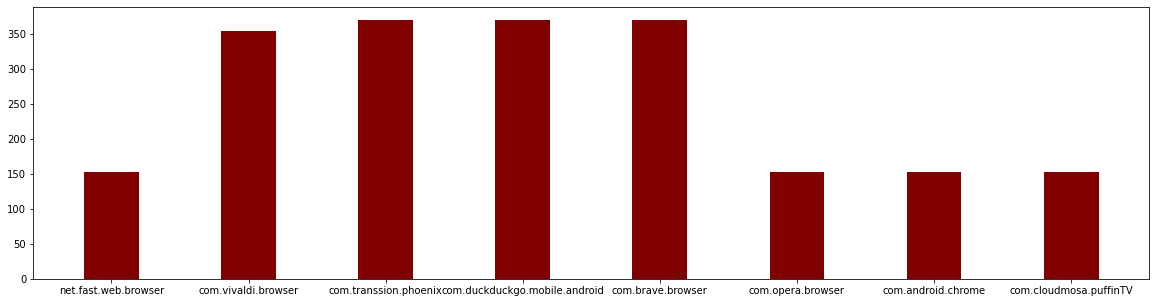

In [9]:
fig = plt.figure(figsize = (20, 5))
plt.bar( appid_size_dict.keys(), appid_size_dict.values(), color ='maroon',
        width = 0.4)


##### It is identified that vivadi browser and transsision phenonix browser rankings are varying a lot, where as opera and brave browser varying in ranges of rankings 1 to 20 - so the app ID or type seems to have some effect on the ranking.

In [10]:
rankings_data["nwords_short"] = rankings_data["Short Description"].apply(lambda x: len(x.split(" ")))

In [11]:
rankings_data["nwords_long"] = rankings_data["Long Description"].apply(lambda x: len(x.split(" ")))

In [12]:
unique_ranks = list(set(rankings_data["Rank"].to_list()))

In [29]:
apprank_nsw_mean_dict = {}
apprank_nlw_mean_dict = {}
#apprank_size_dict = {}
for rank in unique_ranks:
    apprank_df = rankings_data[rankings_data["Rank"]==rank]
    nsw_val = apprank_df["nwords_short"].to_list()
    nlw_val = apprank_df["nwords_long"].to_list()
    apprank_nsw_mean_dict[rank] = sum(nsw_val)/len(nsw_val)
    apprank_nlw_mean_dict[rank] = sum(nlw_val)/len(nlw_val)
    #apprank_size_dict[rank] = len(nsw_val)

<BarContainer object of 119 artists>

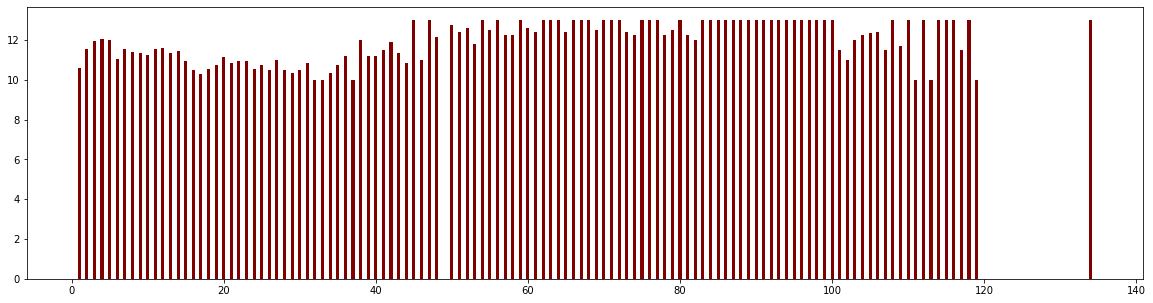

In [30]:
fig = plt.figure(figsize = (20, 5))
plt.bar(apprank_nsw_mean_dict.keys(), apprank_nsw_mean_dict.values(), color ='maroon',
        width = 0.4)

<BarContainer object of 119 artists>

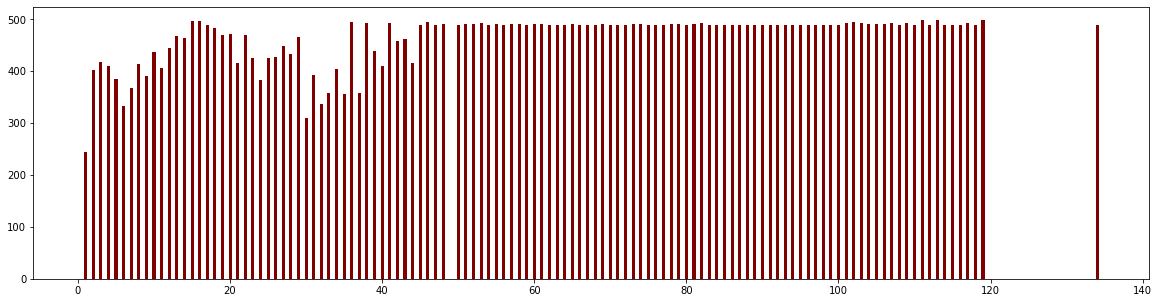

In [31]:
fig = plt.figure(figsize = (20, 5))
plt.bar(apprank_nlw_mean_dict.keys(), apprank_nlw_mean_dict.values(), color ='maroon',
        width = 0.4)

##### It is identified that the descriptions that has less number of words in description in both short and long description has got good rankings.